# Monte Carlo: 2D Ising Model-1

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# initialize system parameters
J = 1.0
kB = 1.0

# Hamiltonian
def energy(s, L):
    E = 0
    for i in range(L):
        for j in range(L):
            E += s[i,j] * (s[(i+1)%L, j] + s[i, (j+1)%L])
    energy = -J * E
    return energy

# magnetization
def magnet(s, L):
    M = 0.0
    for i in range(L):
        for j in range(L):
            M += s[i,j]
    return M

def random_spins(L):
    s = np.zeros([L,L], int)
    for i in range(L):
        for j in range(L):
            s[i,j] = 2 * int( 2 * np.random.random() ) -1
    return s

def dE(s, L, i, j):
    NB = s[(i+1)%L,j]+s[i,(j+1)%L]+s[(i-1)%L,j]+s[i,(j-1)%L]
    dE = 2 * s[i,j]*NB
    return dE

def printSPINS(s, L):
    for i in range(L):
        row = ''
        for j in range(L):
            if s[i,j] == +1: row += '＋'
            if s[i,j] == -1: row += '－'
        print(row)
    print()

In [39]:
# check energy difference when one spin is flipped
L = 8
spins = random_spins(L)
spins_new = np.copy(spins)
spins_new[1, 1]=-spins_new[1, 1]

printSPINS(spins, L)
printSPINS(spins_new, L)

print(energy(spins, L), energy(spins_new, L), energy(spins_new, L)-energy(spins, L), dE(spins, L, 1, 1))
print(magnet(spins, L), magnet(spins_new, L))

－＋－＋＋－＋－
－－－－＋＋＋－
－－＋＋＋＋－－
＋＋＋－＋－－－
＋＋＋－－－－＋
－＋＋－－－＋＋
＋－－－－＋＋＋
－－＋－＋－－－

－＋－＋＋－＋－
－＋－－＋＋＋－
－－＋＋＋＋－－
＋＋＋－＋－－－
＋＋＋－－－－＋
－＋＋－－－＋＋
＋－－－－＋＋＋
－－＋－＋－－－

-20.0 -16.0 4.0 4
-6.0 -4.0


In [41]:
# initialize measurements
T = 2
kB = 1.0
beta = 1.0/(kB*T)

E_ave = 0.0
E_sqr_ave = 0.0
M_ave = 0.0
M_sqr_ave = 0.0

# main MC loop
L = 8
N_MC = 10000
accept = 0

# spins = np.ones( [L, L], int)
spins = random_spins(L)
# printSPINS(spins, L)

print('T={}, L={}'.format(T, L))


for n in range(N_MC):
    # sequential update
    for i in range(L):
        for j in range(L):
            if np.random.random() < np.exp(- beta * dE(spins, L, i, j)):
                spins[i,j] = -spins[i,j]
                accept += 1
    # measurements
#     printSPINS(spins, L)
    E = energy(spins, L)
    E_ave += E
    E_sqr_ave += E*E
    m = magnet(spins, L)
#     M_ave += m
    M_ave += np.abs(m)
    M_sqr_ave += m*m
    
    # average
    UPDATES = (n+1)
    acceptRatio = accept/UPDATES
    acceptRatio = acceptRatio/(L*L)

    E = E_ave/UPDATES
    E_sqr = E_sqr_ave/UPDATES
    C = beta*beta*(E_sqr-E*E)
    E = E/(L*L) # energy per site

    M = M_ave/UPDATES
    M_sqr = M_sqr_ave/UPDATES    
    chi = beta*(M_sqr-M*M)/(L*L)
    M = M/(L*L) # magnetization per site
#     printSPINS(spins, L)

print('{:<8} {:<16} {:<16} {:<16} {:<16} {:<16}'.format('UPDATES', '<E>/N=<e>', 'C', '<M>/N=<m>', 'chi/N', 'acceptRatio')  )
print('{:<8d} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(N_MC, E, C, M, chi, acceptRatio))    
printSPINS(spins, L)

T=2, L=8
UPDATES  <E>/N=<e>        C                <M>/N=<m>        chi/N            acceptRatio     
10000    -1.739156        +47.400791       +0.907959        +0.382266        +0.081609       
＋＋＋＋＋＋＋＋
＋＋＋＋＋＋＋＋
＋＋＋＋＋＋＋＋
＋＋＋＋＋＋＋＋
＋＋＋＋＋＋＋＋
＋＋＋＋＋＋＋＋
＋＋＋＋＋＋＋＋
－＋＋＋＋＋＋＋



## Make MC simuilation into a function

In [42]:
def Monte_Carlo(T, L, N_MC, spins):
    # initialize measurements
    beta = 1.0/(kB*T)
    E_sum = 0.0
    E_sqr_sum = 0.0
    M_sum = 0.0
    M_sqr_sum = 0.0
    accept = 0

    M_list = []

    # main MC loop
    for n in range(N_MC):
        # sequential update
        for i in range(L):
            for j in range(L):
                if np.random.random() < np.exp(- beta * dE(spins, L, i, j)):
                    spins[i,j] = -spins[i,j]
                    accept += 1
        # measurements
        E = energy(spins, L)
        E_sum += E
        E_sqr_sum += E*E
        m = magnet(spins, L)
#         M_sum += m # for <m>
        M_sum += np.abs(m) # for <|m|>
        M_sqr_sum += m*m
        M_list += [m/(L*L)]
        
    # average
    UPDATES = N_MC
    acceptRatio = accept/UPDATES/(L*L)

    E = E_sum/UPDATES
    E_sqr = E_sqr_sum/UPDATES
    C = (E_sqr-E*E)/(kB*T*T)

    M = M_sum/UPDATES
    M_sqr = M_sqr_sum/UPDATES    
    chi = (M_sqr-M*M)/(kB*T)
    
    return E, C, M, chi, acceptRatio

In [43]:
L = 8
N = L * L
T = 2.2
N_MC = 1000
spins = np.ones( [L, L], int)
E, C, M, chi, acceptRatio = Monte_Carlo(T, L, N_MC, spins)
print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16}'.format('T', '<E>/N=<e>', 'C', '<M>/N=<m>', 'chi/N', 'acceptRatio')  )
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(T, E/N, C/N, M/N, chi/N, acceptRatio))

T    <E>/N=<e>        C                <M>/N=<m>        chi/N            acceptRatio     
2.2  -1.568250        +1.048840        +0.817594        +1.038080        +0.141609       


In [44]:
L = 16
spins = np.ones( [L, L], int)
Monte_Carlo(2.2, 16, 1000, spins)

(-395.896, 357.78950082644724, 201.568, 792.7151709090883, 0.15065234375)

In [8]:
T = 2
L = 8
N = L * L
spins = np.ones( [L, L], int)
E, C, M, chi, acceptRatio = Monte_Carlo(T,L,1000,spins)

print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16}'.format('T', '<E>/N=<e>', 'C', '<M>/N=<m>', 'chi/N', 'acceptRatio')  )
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(T, E/N, C, M/N, chi/N, acceptRatio))    

T    <E>/N=<e>        C                <M>/N=<m>        chi/N            acceptRatio     
2    -1.757625        +41.636464       +0.918344        +0.271351        +0.074563       


In [9]:
print("MC:Sweeps in sequence")
print("d=2 Ising model")
print("Number of equilitribum sweeps")
print("Number of MC sweeps")

T_0 = 1.0
dT = 1
N_sim = 8
N_equilib = 100
N_MC = 1000
L = 8
N = L * L

spins = np.ones( [L, L], int)
print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16}'.format('T', '<E>/N=<e>', 'C/N', '<M>/N=<m>', 'chi/N', 'acceptRatio')  )
for n in range(N_sim):
    T = T_0 + n * dT
    E, C, M, chi, acceptRatio = Monte_Carlo(T, L, N_equilib, spins)
    E, C, M, chi, acceptRatio = Monte_Carlo(T, L, N_MC, spins)
    print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(T, E/N, C/N, M/N, chi/N, acceptRatio))    

MC:Sweeps in sequence
d=2 Ising model
Number of equilitribum sweeps
Number of MC sweeps
T    <E>/N=<e>        C/N              <M>/N=<m>        chi/N            acceptRatio     
1.0  -1.996625        +0.027771        +0.999125        +0.001951        +0.000875       
2.0  -1.745062        +0.796922        +0.907312        +0.447464        +0.080172       
3.0  -0.846812        +0.477767        +0.343219        +1.081306        +0.448906       
4.0  -0.569063        +0.170375        +0.214812        +0.387127        +0.610734       
5.0  -0.434437        +0.104226        +0.168719        +0.212322        +0.692344       
6.0  -0.352563        +0.064917        +0.152688        +0.133365        +0.744203       
7.0  -0.293875        +0.041843        +0.139094        +0.104264        +0.785797       
8.0  -0.270250        +0.031715        +0.134937        +0.083444        +0.812281       


MC:Sweeps in sequence
d=2 Ising model
Number of equilitribum sweeps
Number of MC sweeps
MC for L=2
MC for L=4
MC for L=6


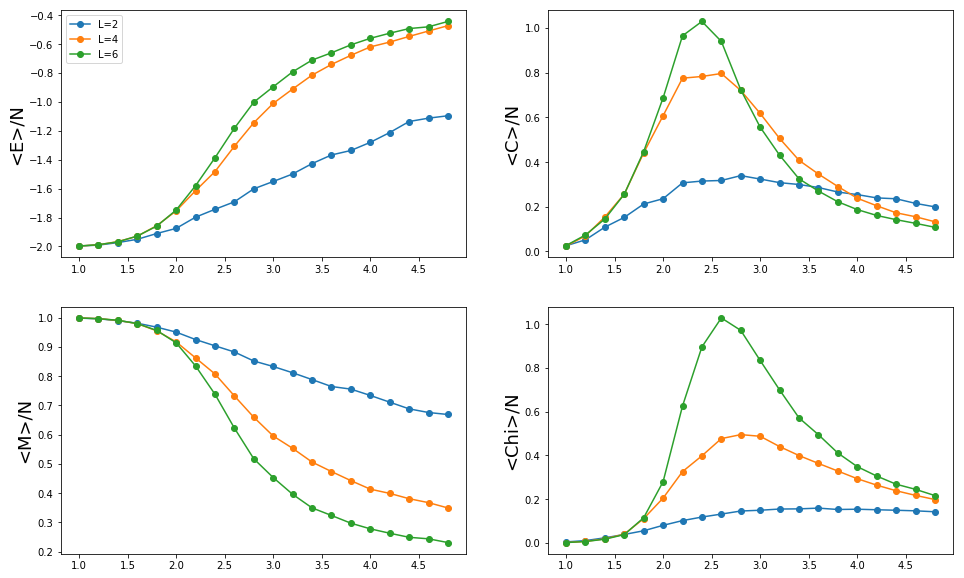

In [45]:
print("MC:Sweeps in sequence")
print("d=2 Ising model")
print("Number of equilitribum sweeps")
print("Number of MC sweeps")

T_0 = 1
dT = 0.2
N_sim = 20
N_equilib = 100
N_MC = 10000

fig, axes = plt.subplots(2, 2, figsize=(16,10))
                         
for L in [2,4,6]:
    print('MC for L={}'.format(L))
    N = L * L
    
    T_list  =[]
    e_list = []
    c_list = []
    m_list = []
    chi_list = []
    
    for n in range(N_sim):
        spins = np.ones( [L, L], int)
        T = T_0 + n * dT
        E, C, M, chi, acceptRatio = Monte_Carlo(T, L, N_equilib, spins)
        E, C, M, chi, acceptRatio = Monte_Carlo(T, L, N_MC, spins)
#         print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(T, E/N, C/N, M/N, chi/N, acceptRatio))   
        T_list += [T]
        e_list += [E/N]
        c_list += [C/N]
        m_list += [M/N]
        chi_list += [chi/N]

    axes[0,0].plot(T_list, e_list, '-o', label='L={}'.format(L))
    axes[0,1].plot(T_list, c_list, '-o')
    axes[1,0].plot(T_list, m_list, '-o')        
    axes[1,1].plot(T_list, chi_list, '-o')
        
axes[0,0].set_ylabel('<E>/N', fontsize=18)
axes[0,1].set_ylabel('<C>/N', fontsize=18)
axes[1,0].set_ylabel('<M>/N', fontsize=18)
axes[1,1].set_ylabel('<Chi>/N', fontsize=18)

axes[0,0].legend()

## Random update

In [31]:
def Monte_Carlo2(T, L, N_MC, spins):
    # initialize measurements
    beta = 1.0/(kB*T)
    E_sum = 0.0
    E_sqr_sum = 0.0
    M_sum = 0.0
    M_sqr_sum = 0.0
    accept = 0

    M_list = []

    # main MC loop
    for n in range(N_MC):
        # random update
        for update in range(L*L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if np.random.random() < np.exp(- beta * dE(spins, L, i, j)):
                spins[i,j] = -spins[i,j]
                accept += 1
        # measurements
        E = energy(spins, L)
        E_sum += E
        E_sqr_sum += E*E
        m = magnet(spins, L)
#         M_sum += m # for <m>?
        M_sum += np.abs(m) # for <|m|>
        M_sqr_sum += m*m
        M_list += [m/(L*L)]
        
    # average
    UPDATES = N_MC
    acceptRatio = accept/UPDATES/(L*L)

    E = E_sum/UPDATES
    E_sqr = E_sqr_sum/UPDATES
    C = (E_sqr-E*E)/(kB*T*T)

    M = M_sum/UPDATES
    M_sqr = M_sqr_sum/UPDATES    
    chi = (M_sqr-M*M)/(kB*T)
    
    return E, C, M, chi, acceptRatio

In [33]:
Monte_Carlo2(2.2,8,1000, spins)

(-96.872, 81.41644958677678, 49.4, 96.53090909090926, 0.16078125)

In [34]:
T = 2
L = 8
N = L * L

spins = np.ones( [L, L], int)

E, C, M, chi, acceptRatio = Monte_Carlo(T,L,1000, spins)
print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16}'.format('T', '<E>/N=<e>', 'C', '<M>/N=<m>', 'chi/N', 'acceptRatio')  )
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(T, E/N, C, M/N, chi/N, acceptRatio))    

E, C, M, chi, acceptRatio = Monte_Carlo2(T,L,1000, spins)
print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16}'.format('T', '<E>/N=<e>', 'C', '<M>/N=<m>', 'chi/N', 'acceptRatio')  )
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(T, E/N, C, M/N, chi/N, acceptRatio))    

T    <E>/N=<e>        C                <M>/N=<m>        chi/N            acceptRatio     
2    -1.757000        +38.965824       +0.919875        +0.204184        +0.074188       
T    <E>/N=<e>        C                <M>/N=<m>        chi/N            acceptRatio     
2    -1.759688        +45.691900       +0.915406        +0.394661        +0.075797       


MC:Sweeps in random
d=2 Ising model
Number of equilitribum sweeps
Number of MC sweeps
MC for L=2
MC for L=4
MC for L=6
MC for L=8


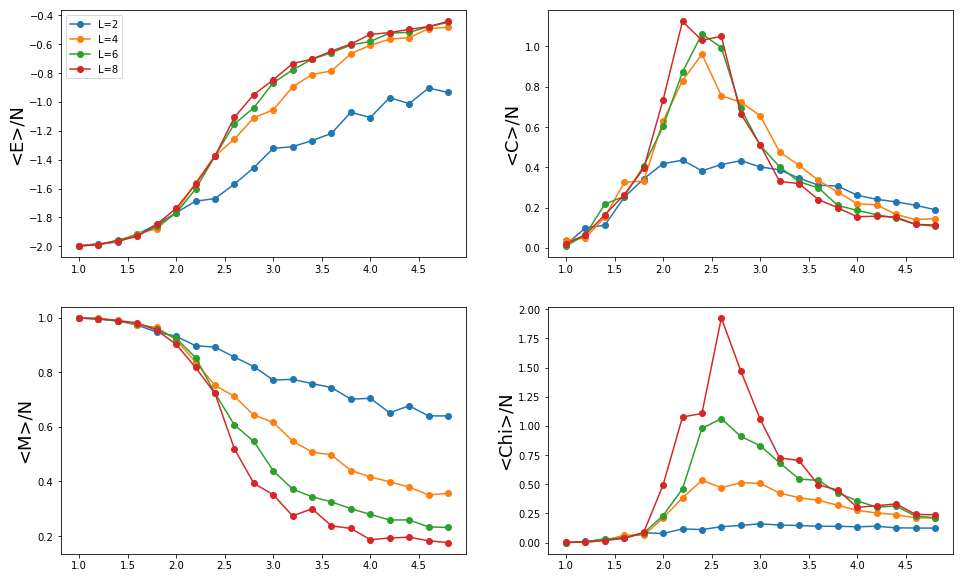

In [36]:
print("MC:Sweeps in random")
print("d=2 Ising model")
print("Number of equilitribum sweeps")
print("Number of MC sweeps")

T_0 = 1
dT = 0.2
N_sim = 20
N_equilib = 100
N_MC = 1000

fig, axes = plt.subplots(2, 2, figsize=(16,10))
                         
for L in [2,4,6,8]:
    print('MC for L={}'.format(L))
    N = L * L
    
    T_list  =[]
    e_list = []
    c_list = []
    m_list = []
    chi_list = []
    
    for n in range(N_sim):
        spins = np.ones( [L, L], int)
        T = T_0 + n * dT
        E, C, M, chi, acceptRatio = Monte_Carlo2(T,L,N_equilib, spins)
        E, C, M, chi, acceptRatio = Monte_Carlo2(T,L,N_MC, spins)
#         print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(T, E/N, C/N, M/N, chi/N, acceptRatio))   
        T_list += [T]
        e_list += [E/N]
        c_list += [C/N]
        m_list += [M/N]
        chi_list += [chi/N]

    axes[0,0].plot(T_list, e_list, '-o', label='L={}'.format(L))
    axes[0,1].plot(T_list, c_list, '-o')
    axes[1,0].plot(T_list, m_list, '-o')        
    axes[1,1].plot(T_list, chi_list, '-o')
        
axes[0,0].set_ylabel('<E>/N', fontsize=18)
axes[0,1].set_ylabel('<C>/N', fontsize=18)
axes[1,0].set_ylabel('<M>/N', fontsize=18)
axes[1,1].set_ylabel('<Chi>/N', fontsize=18)

axes[0,0].legend()
